### Requisitos:

 1. Carga y Exploración de Datos:
       * Descargar y cargar el dataset.
       * Realizar una exploración inicial para entender la estructura del dataset.
       * Identificar valores faltantes, duplicados y outliers.
 2. Limpieza y Preprocesamiento:
       * Manejar valores faltantes.
       * Eliminar duplicados.
       * Corregir inconsistencias en los datos categóricos.
       * Escalar las características numéricas.
       * Realizar transformaciones necesarias para las características categóricas.
 3. Exploración de Datos:
       * Crear visualizaciones univariadas y multivariadas.
       * Calcular estadísticas descriptivas.
 4. Modelado y Evaluación:
       * Implementar al menos dos modelos de regresión (Linear Regression y Random Forest Regressor).
       * Evaluar los modelos utilizando MSE, RMSE, y R^2.
       * Seleccionar el mejor modelo basado en las métricas de evaluación.
 5. Optimización del Modelo:
       * Optimizar el modelo seleccionado utilizando GridSearchCV.
 6. Documentación y Entrega:
       * Documentar todo el proceso en un archivo .ipynb claramente comentado.
       * Crear visualizaciones con interpretaciones.
       * Subir el archivo a un repositorio en GitHub con un tag de liberación.

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Cargar los datos
df = pd.read_csv('../data/vehicles.csv')

# Exploración básica de los datos
print("Primeras filas del dataset:")
print(df.head())
print("\nDescripción de las columnas:")
print(df.info())
print("\nDescripción estadística:")
print(df.describe())


Primeras filas del dataset:
           id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders  ... size  type paint_color  \
0          NaN   NaN       N

In [3]:
# Identificar valores faltantes, duplicados y outliers
print("Valores faltantes:\n", df.isnull().sum())
print("Duplicados:", df.duplicated().sum())
print("\n####################################################################################################################################################################")
# Eliminar columnas inecesarias
df_clean = df.drop(['url', 'region_url', 'image_url', 'county'], axis=1)

# Verifica las columnas que no son numéricas
non_numeric_cols = df_clean.select_dtypes(exclude=[np.number]).columns
print(f"Columnas no numéricas: {non_numeric_cols}")
print("\n####################################################################################################################################################################")

# Visualización inicial de outliers (gráficos de cajas)
num_columns = df_clean.select_dtypes(include=[np.number]).columns

# Manejo de valores faltantes
df_clean.fillna({
    'model': 'desconocido',  # Cambiar por la columna correspondiente
    'price': df_clean['price'].median()  # Cambiar por la columna correspondiente
}, inplace=True)

# Identificar valores faltantes, duplicados y outliers
print("Valores faltantes:\n", df_clean.isnull().sum())
print("Duplicados:", df_clean.duplicated().sum())

print(df_clean.head(5))

# Eliminar duplicados
df_clean.drop_duplicates(inplace=True)

# Escalar características numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_clean[num_columns] = scaler.fit_transform(df_clean[num_columns])

# Transformación de categóricas (One-Hot Encoding)
df_clean = pd.get_dummies(df_clean, drop_first=True)


Valores faltantes:
 id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64
Duplicados: 0

####################################################################################################################################################################
Columnas no numéricas: Index(['region', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color

MemoryError: Unable to allocate 47.0 GiB for an array with shape (426880, 118264) and data type bool

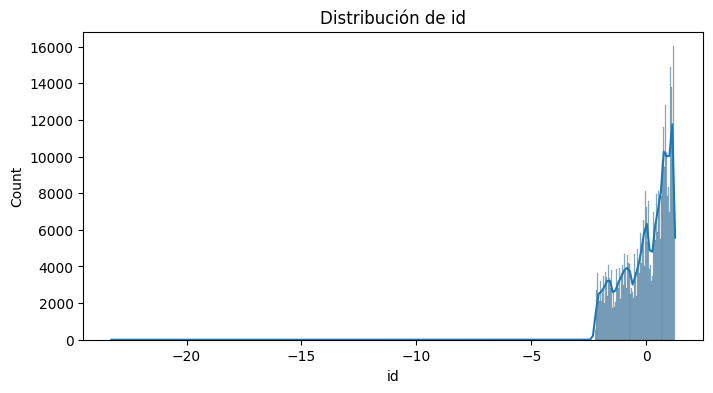

KeyboardInterrupt: 

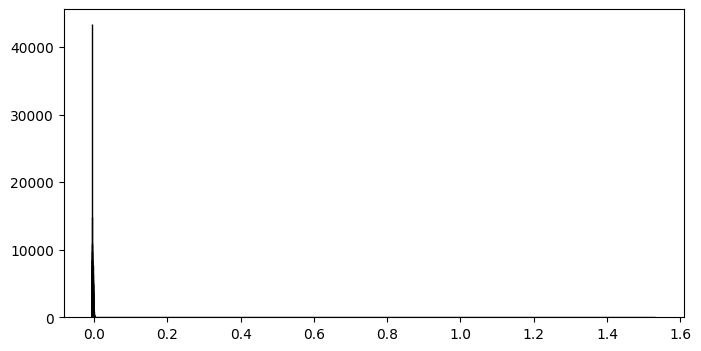

In [5]:
# Visualizaciones univariadas
for col in num_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()

# Visualizaciones multivariadas (matriz de correlación)
plt.figure(figsize=(10, 6))
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Estadísticas descriptivas
print(df_clean.describe())


In [ ]:
# Separar variables predictoras y target
from sklearn.ensemble import RandomForestRegressor


X = df_clean.drop('year', axis=1)  # Cambiar 'Target_Column' por la columna objetivo
y = df_clean['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluación de modelos
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MSE: {mse}, RMSE: {rmse}, R^2: {r2}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


In [ ]:
# Optimización del Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor modelo
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

evaluate_model(y_test, y_pred_best_rf, "Optimized Random Forest")
